This analysis is for classification of APS failures. The null values in train and test data have been imputed with zero.  

https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve , precision_recall_curve, f1_score, average_precision_score
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV, KFold


In [95]:
from sklearn.feature_selection import RFE

In [96]:
import graphviz 
import sklearn.tree as tree

In [97]:
## Read in the train data sets 
train_data_1 = pd.read_csv("train_data_1.csv")


In [98]:
## Read in the test data sets 
test_data_1 = pd.read_csv("test_data_1.csv")


In [99]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   60000 non-null  object 
 1   ag_003  60000 non-null  float64
 2   ag_004  60000 non-null  float64
 3   ag_005  60000 non-null  float64
 4   ag_006  60000 non-null  float64
 5   ag_007  60000 non-null  float64
 6   ah_000  60000 non-null  float64
 7   al_000  60000 non-null  float64
 8   ap_000  60000 non-null  float64
 9   ay_001  60000 non-null  float64
 10  ay_005  60000 non-null  float64
 11  ay_006  60000 non-null  float64
 12  ay_007  60000 non-null  float64
 13  ay_008  60000 non-null  float64
 14  az_003  60000 non-null  float64
 15  az_004  60000 non-null  float64
 16  az_005  60000 non-null  float64
 17  az_006  60000 non-null  float64
 18  ba_000  60000 non-null  float64
 19  ba_006  60000 non-null  float64
 20  ba_007  60000 non-null  float64
 21  cj_000  60000 non-null  float64
 22

In [100]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   16000 non-null  object 
 1   ag_003  16000 non-null  float64
 2   ag_004  16000 non-null  float64
 3   ag_005  16000 non-null  float64
 4   ag_006  16000 non-null  float64
 5   ag_007  16000 non-null  float64
 6   ah_000  16000 non-null  float64
 7   al_000  16000 non-null  float64
 8   ap_000  16000 non-null  float64
 9   ay_001  16000 non-null  float64
 10  ay_005  16000 non-null  float64
 11  ay_006  16000 non-null  float64
 12  ay_007  16000 non-null  float64
 13  ay_008  16000 non-null  float64
 14  az_003  16000 non-null  float64
 15  az_004  16000 non-null  float64
 16  az_005  16000 non-null  float64
 17  az_006  16000 non-null  float64
 18  ba_000  16000 non-null  float64
 19  ba_006  16000 non-null  float64
 20  ba_007  16000 non-null  float64
 21  cj_000  16000 non-null  float64
 22

In [101]:
def perform_classification(model , X_train,X_test,y_train,y_test, classifier):
    
    model = model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix with the predicted class  :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    if classifier == 'dt':
            print("\n Max depth:{} ".format(model.tree_.max_depth))
        
    
    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.scatter(fpr[ix1], tpr[ix1], marker='o', color='black', label='Best')
    plt.show()
    
    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    ####
    # convert to f score
    #fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest recall 
    #ix = np.argmax(recall)
    #best_threshold = pr_thresholds[ix]
    #print('Best Threshold for PR curve =%f, Recall=%.3f' % (pr_thresholds[ix], recall[ix]))
    ####
    
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    def cal_opt_class(val, threshold):
        return (val >= threshold).astype('int')
    
    #opt_class = pd.Series(preds).apply(lambda x: cal_opt_class(x,best_threshold))
    
    #print("Confusion matrix with opt threshold:\n{}".format(confusion_matrix(y_test,opt_class)))
    
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    # define thresholds
    #thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold
    #scores = [f1_score(y_test, to_labels(preds, t)) for t in thresholds]
    # get best threshold
    #ix = np.argmax(scores)
    #print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    #p_class = to_labels(preds , thresholds[ix])
    #print("Confusion matrix with opt threshold search :\n{}".format(confusion_matrix(y_test,p_class)))
    
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : y_test , "pred_class" : test_pred})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]
    
    total_cost = fp*10 + fn*500
    
    print("Total_cost of mis- classification : {}".format(total_cost))
    
    ## Plot Variable importance for decision tree , random forest
    if (classifier == 'dt') | (classifier == 'rf') | (classifier == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,5))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)


In [102]:
cols = train_data_1.columns.tolist()
cont_features = cols[1:]

In [103]:
train_data_1['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [104]:
def make_numeric(val):
    if val == 'neg':
        return 0
    else:
        return 1
train_data_1['label'] = train_data_1['class'].apply(lambda x: make_numeric(x))

In [105]:
train_data_1['label'].value_counts()

0    59000
1     1000
Name: label, dtype: int64

In [106]:
test_data_1['label'] = test_data_1['class'].apply(lambda x: make_numeric(x))

In [107]:
test_data_1['label'].value_counts()

0    15625
1      375
Name: label, dtype: int64

In [108]:
def feature_selection(model, data , cont_features):
    """
    for the given model , data and features, select the best features with RFE.
    """
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[cont_features] = scaler.fit_transform(data1[cont_features])
    ##
    predictors = data1[cont_features]
    ##
    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_validate : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_validate : {}".format(y_validate.shape))
    ##
    rfe = RFE(model, n_features_to_select = 10)
    fit = rfe.fit(X_train, y_train)
    # report selected features
    names = X_train.columns
    print('Selected Features:\n')
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ##
    # plot feature rank

    ticks = [i for i in range(len(names))]
    selected_ranking = []
    selected_ticks = []
    ranking = list(fit.ranking_)
    for i in range(len(names)):
        if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
            selected_ranking.append(ranking[i])
            selected_ticks.append(list(names)[i])
        
    plt.figure(figsize = (15,5))
    plt.bar(selected_ticks, selected_ranking)
    plt.xticks(selected_ticks, rotation = 90)
    plt.ylabel("Rankings")
    plt.title("First 3 ranks")
    plt.show()
    
    return

In [109]:
def parameter_tuning(model, param_grid, data , n_features):
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_test : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_test : {}".format(y_validate.shape))

    cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 12)
    
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    #
    print(grid_search.best_params_)
    #
    model_best = grid_search.best_estimator_
    model_predictions = model_best.predict(X_validate)
    #
    print("Test set score using predicted labels: {:.2f}".format(np.mean(model_predictions == y_validate)))

    print("Calculated Test set score: {:.2f}".format(model_best.score(X_validate,y_validate)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_validate,model_predictions)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_validate,model_predictions)))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model_best.predict_proba(X_validate)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_validate, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    ##Calculate AUC and plot precision recall curve.
    precision, recall, thresholds = precision_recall_curve(y_validate, preds)
    pr_auc = auc(recall, precision)
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    return
    

In [110]:
def cross_validation(model, data , n_features ):
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 33)
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    scores = cross_val_score(model , predictors , data1['label'], cv = cv,scoring = 'recall' )
    print(scores)
    print("\n Avg AUC score for PR curve:{}".format(scores.mean()))

    ## predict class
    pred_class = cross_val_predict(model, predictors , data1['label'], cv = cv )

    ##predict probability values
    predicted = cross_val_predict(model, predictors, data1['label'], cv = cv, method = 'predict_proba' )
    print("Confusion matrix :\n{}".format(confusion_matrix(data1['label'],pred_class)))

    ##calculate roc auc
    fpr, tpr, thresholds = roc_curve(data1['label'], predicted[:,1])
    roc_auc = auc(fpr, tpr)
    ##

    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(data1['label'], predicted[:,1])
    pr_auc = auc(recall, precision)
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : data1['label'] , "pred_class" : pred_class})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]    
    total_cost = fp*10 + fn*500    
    print("Total_cost of mis- classification : {}".format(total_cost))

    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

    return


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_003
ag_006
ah_000
ay_006
ay_007
ck_000
cn_002
cn_006
ee_005
ee_007


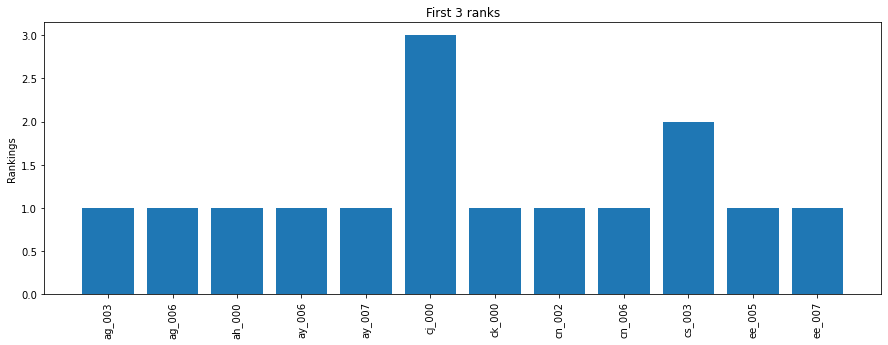

In [79]:
model = LogisticRegression(solver='liblinear')
feature_selection(model , train_data_1 , cont_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9691041666666667
Train Accuracy using predicted labels :0.9691041666666667
Test set score using predicted labels: 0.96
Calculated Test set score: 0.96
Accuracy score :0.964
Confusion matrix with the predicted class  :
[[11391   409]
 [   22   178]]


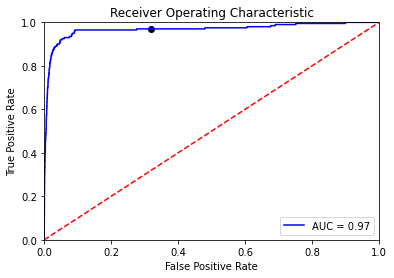

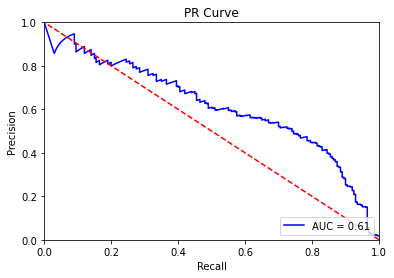

Total_cost of mis- classification : 15090


In [76]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


lg = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', penalty = 'l1')
perform_classification(lg , X_train, X_validate, y_train, y_validate , 'lg')

Check for different class weights 


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'class_weight': {0: 0.4, 1: 0.6}}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11743    57]
 [   85   115]]


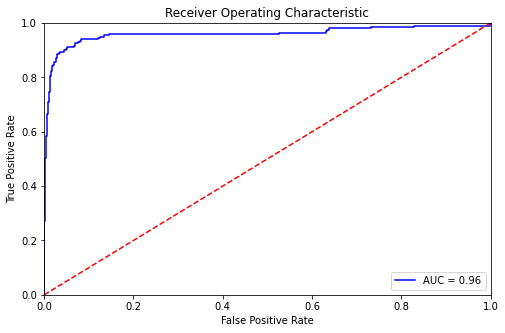

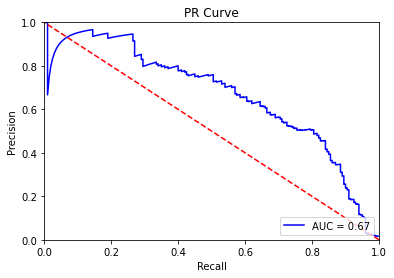

In [84]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
lg = LogisticRegression(random_state = 111, solver = 'liblinear')
param_grid = {
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}],
            }
parameter_tuning(model =lg, param_grid = param_grid, data = train_data_1 , n_features = n_features)

With the selected class weight:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9895
Train Accuracy using predicted labels :0.9895
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix with the predicted class  :
[[11745    55]
 [   86   114]]


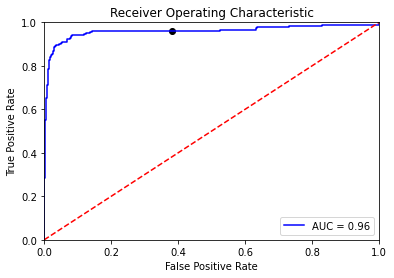

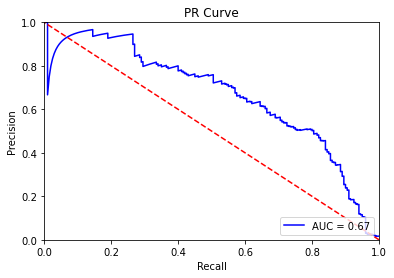

Total_cost of mis- classification : 43550


In [75]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


lg = LogisticRegression(class_weight = {0:0.4 , 1:0.6}, solver = 'liblinear', penalty = 'l1')
perform_classification(lg , X_train, X_validate, y_train, y_validate , 'lg')

Total cost of mis-classification is more with weights 0.4:0.6 , than 'balanced' weights.  

Cross Validate :

[0.94  0.915 0.905 0.87  0.91 ]

 Avg AUC score for PR curve:0.908
Confusion matrix :
[[57174  1826]
 [   92   908]]
Total_cost of mis- classification : 64260


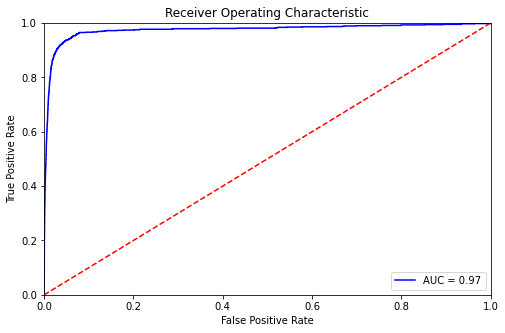

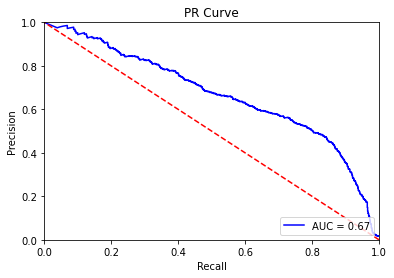

In [47]:
## With scoring = 'recall'
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
lg = LogisticRegression(class_weight = 'balanced', random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_1 , n_features=n_features )


[0.47       0.46923077 0.51057828 0.48199446 0.50345781]

 Avg AUC score for PR curve:0.4870522645984542
Confusion matrix :
[[57174  1826]
 [   92   908]]
Total_cost of mis- classification : 64260


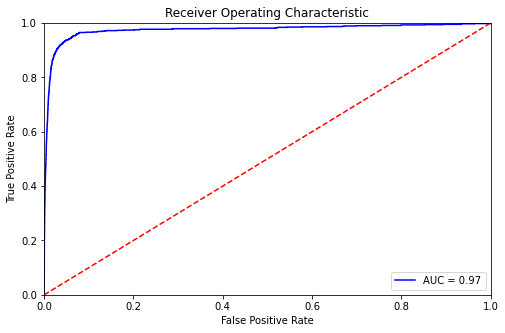

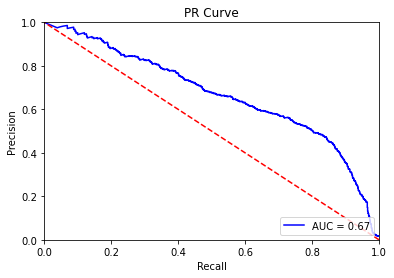

In [24]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
lg = LogisticRegression(class_weight = 'balanced', random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_1 , n_features=n_features )


With weights 0.4:0.6 : 

[0.63783784 0.64204545 0.66081871 0.64751958 0.62465753]

 Avg AUC score for PR curve:0.6425758244651182
Confusion matrix :
[[58770   230]
 [  418   582]]
Total_cost of mis- classification : 211300


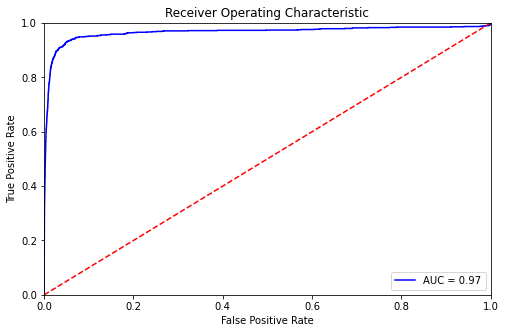

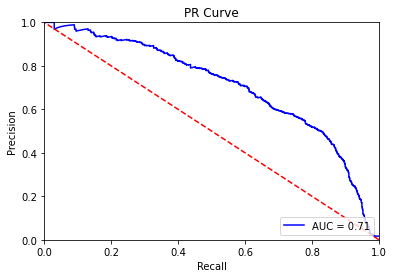

In [25]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
lg = LogisticRegression(class_weight = {0:0.4,1:0.6}, random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_1 , n_features=n_features )

Test the model with 'balanced' weights in test data:

In [72]:
test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   16000 non-null  object 
 1   ag_003  16000 non-null  float64
 2   ag_004  16000 non-null  float64
 3   ag_005  16000 non-null  float64
 4   ag_006  16000 non-null  float64
 5   ag_007  16000 non-null  float64
 6   ah_000  16000 non-null  float64
 7   al_000  16000 non-null  float64
 8   ap_000  16000 non-null  float64
 9   ay_001  16000 non-null  float64
 10  ay_005  16000 non-null  float64
 11  ay_006  16000 non-null  float64
 12  ay_007  16000 non-null  float64
 13  ay_008  16000 non-null  float64
 14  az_003  16000 non-null  float64
 15  az_004  16000 non-null  float64
 16  az_005  16000 non-null  float64
 17  az_006  16000 non-null  float64
 18  ba_000  16000 non-null  float64
 19  ba_006  16000 non-null  float64
 20  ba_007  16000 non-null  float64
 21  cj_000  16000 non-null  float64
 22


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9690625
Train Accuracy using predicted labels :0.9690625
Test set score using predicted labels: 0.97
Calculated Test set score: 0.97
Accuracy score :0.975
Confusion matrix with the predicted class  :
[[15255   370]
 [   34   341]]


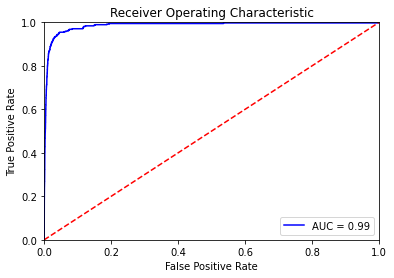

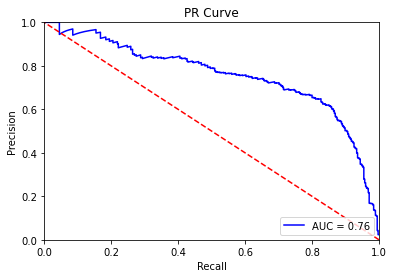

Total_cost of mis- classification : 20700


In [94]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


lg = LogisticRegression(class_weight = 'balanced', random_state = 12 , solver = 'liblinear')
perform_classification(lg , X_train, X_test, y_train, y_test , 'lg')


In [82]:
## save the results 
cls = []
cost = []
auc_val = []
##
cls.append('log_reg')
cost.append(20700)
auc_val.append(0.76)

Coefficient of regression : 

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'label ~ ag_006 + ag_003 + ah_000 + ay_006 + ay_007 + cj_000 + ck_000 + cn_002 + cn_006 + cs_003 + ee_005 + ee_007'
##
data = train_data_1
model = smf.glm(formula = formula, data =train_data_1, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
##
print("\n Coefficeients")
print(result.params)
print()
print("\n p-Values")
print(result.pvalues)
print()
print("\n Dependent variables")
print(result.model.endog_names)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                60000
Model:                            GLM   Df Residuals:                    59987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 02 Nov 2020   Deviance:                          nan
Time:                        15:55:05   Pearson chi2:                 6.73e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7838      0.068    -84.778      0.0

##### Decision Trees Classifier: 


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_003
ag_006
ah_000
ay_006
ay_007
ck_000
cn_002
cn_006
ee_005
ee_007


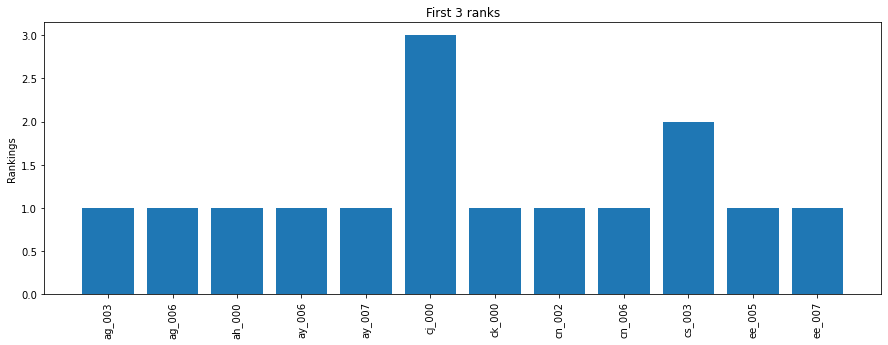

In [81]:
dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced')
feature_selection(dt, train_data_1, cont_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.997125
Train Accuracy using predicted labels :0.997125
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.984
Confusion matrix with the predicted class  :
[[11691   109]
 [   85   115]]

 Max depth:32 


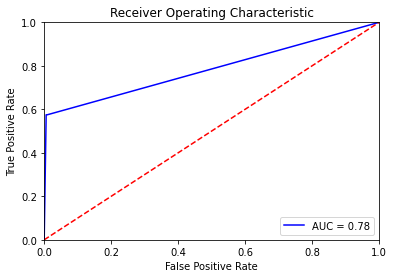

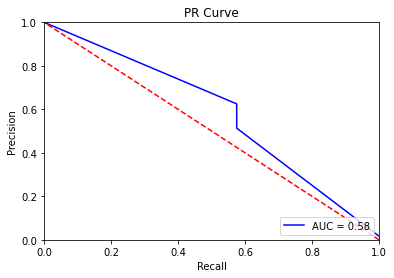

Total_cost of mis- classification : 43590


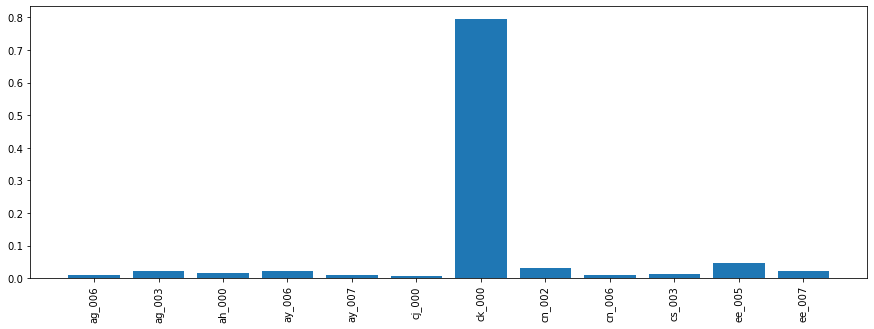

In [27]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced')
perform_classification(dt , X_train, X_validate, y_train, y_validate , 'dt')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'max_depth': 25, 'min_samples_split': 2}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11743    57]
 [   85   115]]


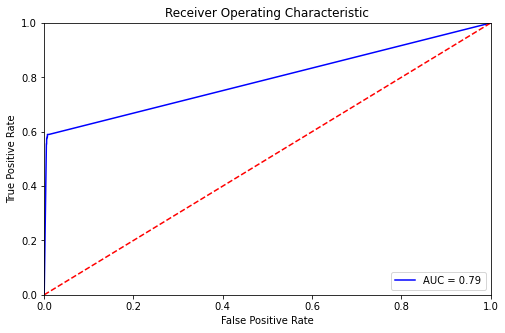

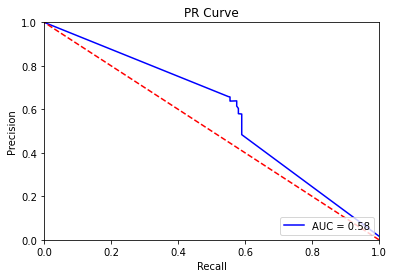

In [88]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced')
param_grid = {
    "max_depth" : [5,10,15,20,25],
    "min_samples_split" : [2,5]
}
parameter_tuning(model=dt, param_grid=param_grid, data=train_data_1 , n_features=n_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9962083333333334
Train Accuracy using predicted labels :0.9962083333333334
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.983
Confusion matrix with the predicted class  :
[[11674   126]
 [   82   118]]

 Max depth:25 


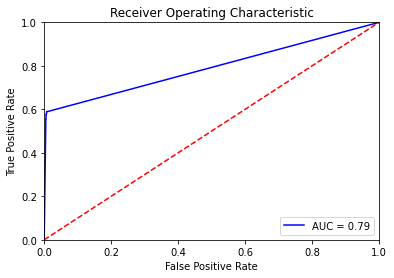

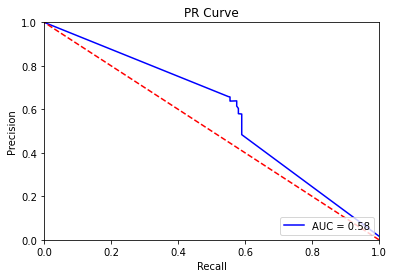

Total_cost of mis- classification : 42260


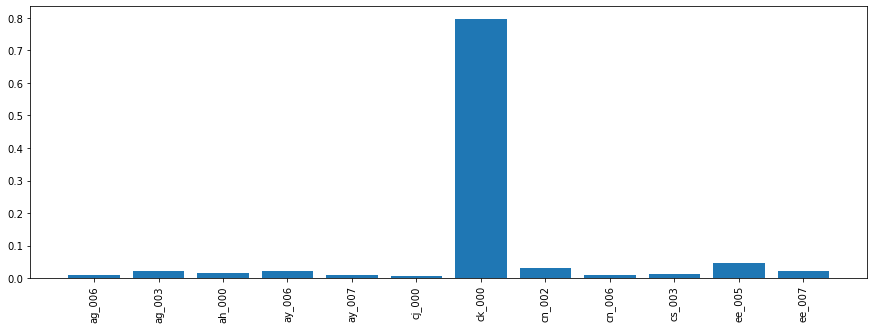

In [28]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25)
perform_classification(dt , X_train, X_validate, y_train, y_validate , 'dt')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'class_weight': {0: 0.5, 1: 0.5}, 'max_depth': 25, 'min_samples_split': 2}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11743    57]
 [   85   115]]


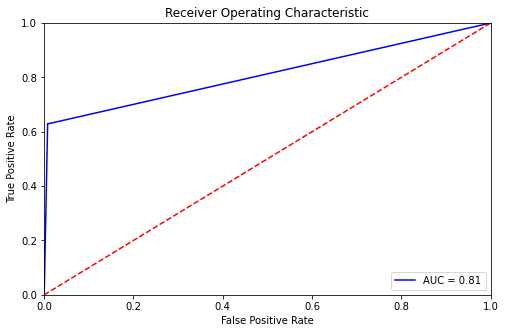

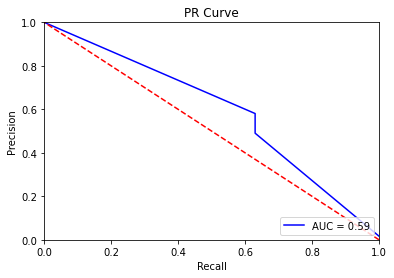

In [89]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
dt = DecisionTreeClassifier(random_state = 14 )
param_grid = {
    "max_depth" : [5,10,15,20,25],
    "min_samples_split" : [2,5],
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}]
}
parameter_tuning(model=dt, param_grid=param_grid, data=train_data_1 , n_features=n_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.986
Confusion matrix with the predicted class  :
[[11709    91]
 [   74   126]]

 Max depth:23 


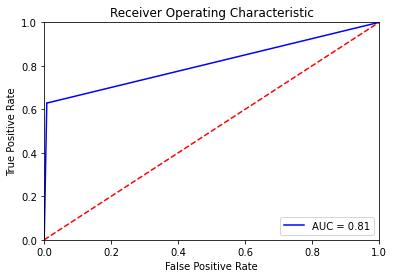

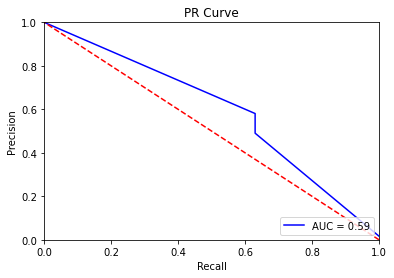

Total_cost of mis- classification : 37910


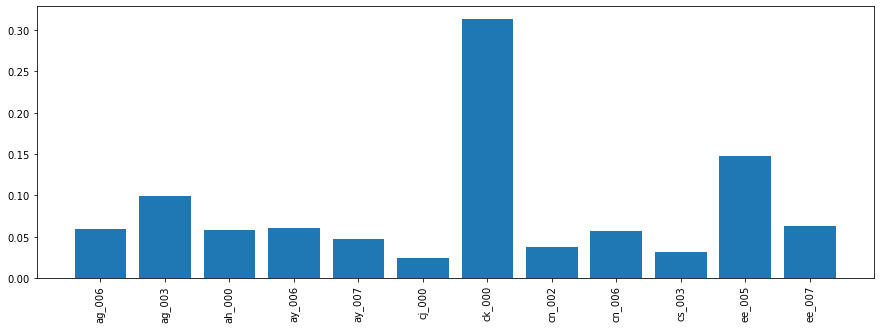

In [29]:
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


dt = DecisionTreeClassifier(random_state = 14 , class_weight = {0:0.5,1:0.5}, max_depth = 25)
perform_classification(dt , X_train, X_validate, y_train, y_validate , 'dt')

[0.67654321 0.67341772 0.68527919 0.62439024 0.67391304]

 Avg AUC score for PR curve:0.666708681318698
Confusion matrix :
[[58685   315]
 [  343   657]]
Total_cost of mis- classification : 174650


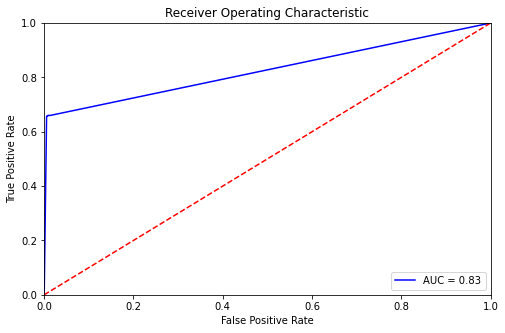

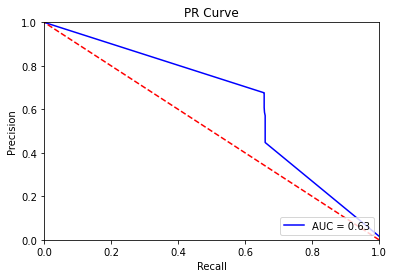

In [30]:
dt = DecisionTreeClassifier(random_state = 14 , class_weight = {0:0.5,1:0.5}, max_depth = 25)
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
cross_validation(model=dt, data= train_data_1 , n_features= n_features )

[0.61971831 0.5707196  0.57142857 0.54883721 0.5752809 ]

 Avg AUC score for PR curve:0.5771969184888248
Confusion matrix :
[[58464   536]
 [  377   623]]
Total_cost of mis- classification : 193860


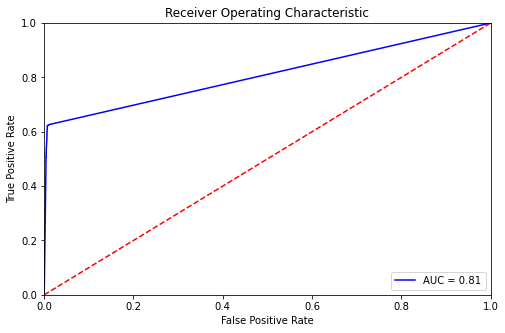

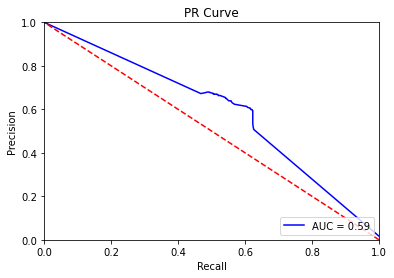

In [91]:
dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25)
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']
cross_validation(model=dt, data= train_data_1 , n_features= n_features )

##### On Test data:


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.985
Confusion matrix with the predicted class  :
[[15503   122]
 [  124   251]]

 Max depth:23 


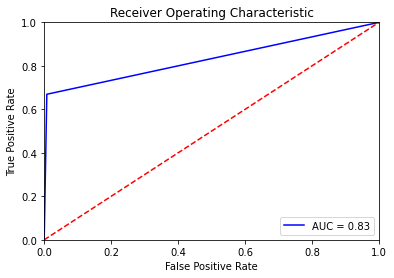

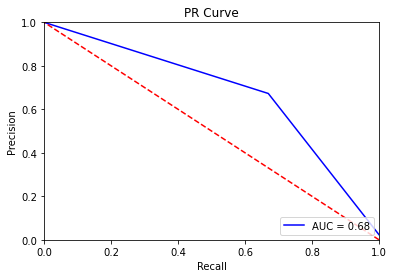

Total_cost of mis- classification : 63220


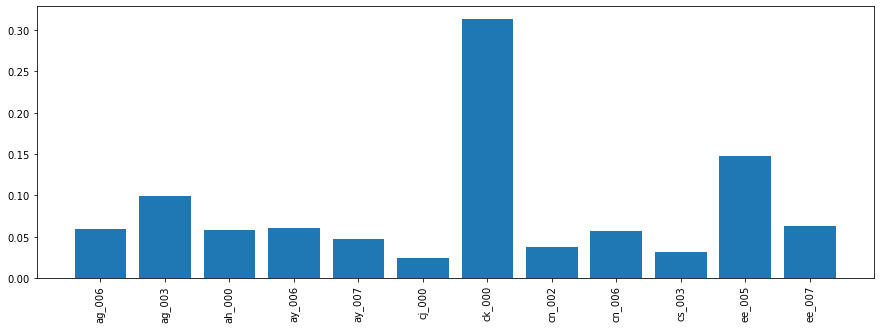

In [31]:
## Check the performance of the model on test data 
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


dt = DecisionTreeClassifier(class_weight = {0:0.5,1:0.5}, random_state = 14, max_depth = 25)
perform_classification(dt , X_train, X_test, y_train, y_test , 'dt')



 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9962083333333334
Train Accuracy using predicted labels :0.9962083333333334
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.983
Confusion matrix with the predicted class  :
[[15529    96]
 [  177   198]]

 Max depth:25 


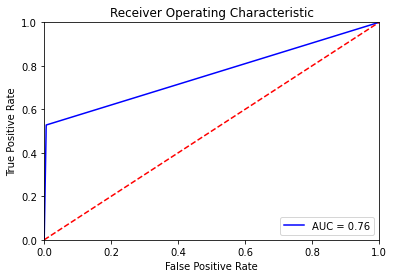

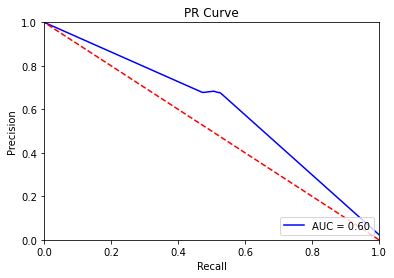

Total_cost of mis- classification : 89460


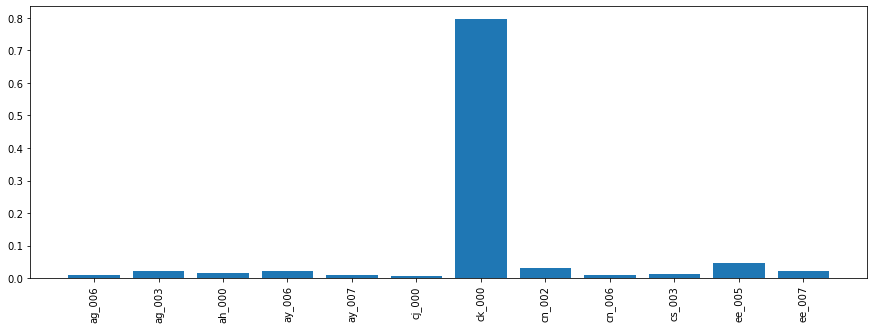

In [92]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 14, max_depth = 25)
perform_classification(dt , X_train, X_test, y_train, y_test , 'dt')


Decision Tree Classifier with weights 50:50 , depth of 25 performs better than the model with 'balanced' weights.

In [83]:
## save the results 
cls.append('decision_trees')
cost.append(63220)
auc_val.append(0.68)

##### Random Forest Classifier


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_005
ah_000
al_000
ap_000
ay_008
ba_000
ck_000
cn_003
cs_002
cs_004


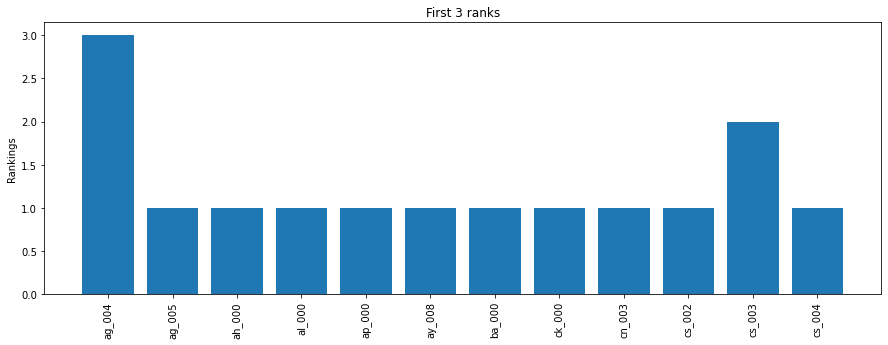

In [26]:
rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced')
feature_selection(model = rf, data = train_data_1, cont_features = cont_features)

Perform Random Forest Classification with the selected features:  


 X_train : (48000, 11)

 X_test : (12000, 11)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.997125
Train Accuracy using predicted labels :0.997125
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.987
Confusion matrix with the predicted class  :
[[11737    63]
 [   95   105]]


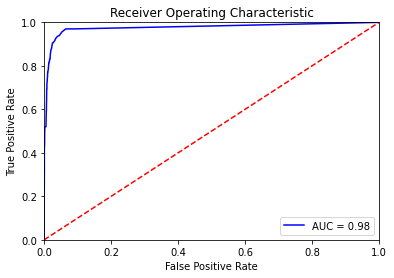

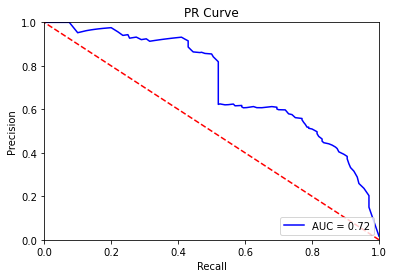

Total_cost of mis- classification : 48130


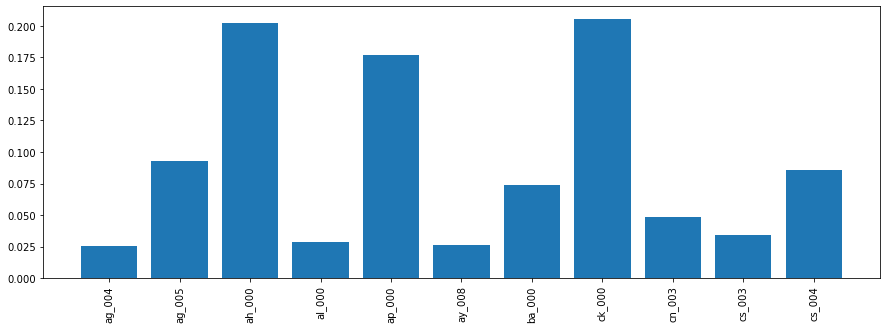

In [28]:
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced')
perform_classification(rf , X_train, X_validate, y_train, y_validate , 'rf')

Gridsearch Random Forest hyper parameters:


 X_train : (48000, 11)

 X_test : (12000, 11)

 y_train : (48000,)

 y_test : (12000,)
{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 900}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.985
Confusion matrix :
[[11693   107]
 [   72   128]]


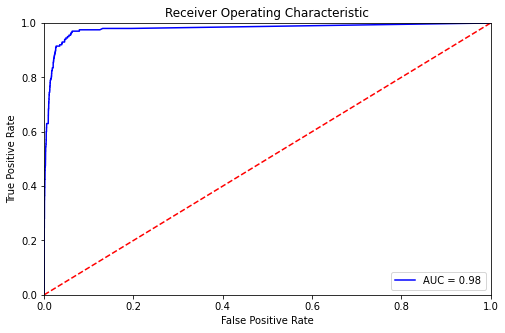

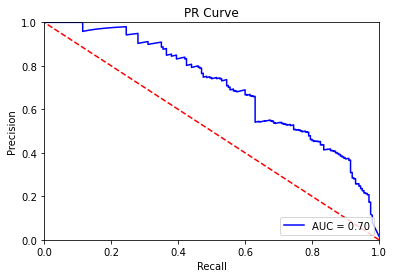

In [21]:
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced')
param_grid = {
    "max_depth" : [15,20,25],
    "min_samples_split" : [2,5],
    "n_estimators" : [500,900]
}
parameter_tuning(model=rf, param_grid=param_grid, data=train_data_1 , n_features=n_features)

Perform Random Forest Classification with the selected features and parameters :  


 X_train : (48000, 11)

 X_test : (12000, 11)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.995875
Train Accuracy using predicted labels :0.995875
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.985
Confusion matrix with the predicted class  :
[[11693   107]
 [   72   128]]


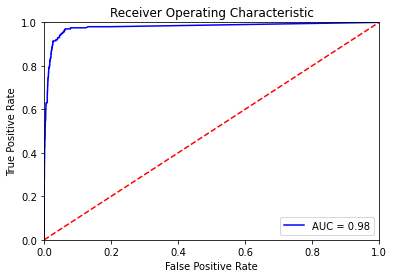

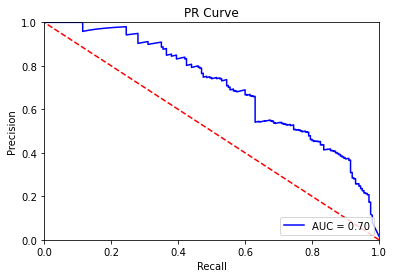

Total_cost of mis- classification : 37070


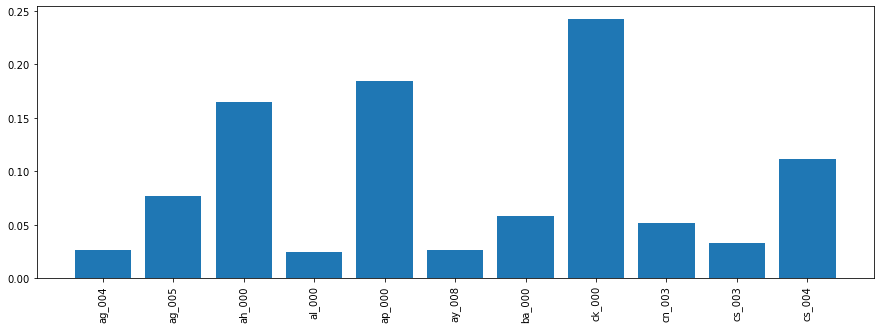

In [22]:
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25, min_samples_split = 5, n_estimators = 900)
perform_classification(rf , X_train, X_validate, y_train, y_validate , 'rf')

Grid search with class weights :  


 X_train : (48000, 11)

 X_test : (12000, 11)

 y_train : (48000,)

 y_test : (12000,)
{'class_weight': {0: 0.3, 1: 0.7}}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix :
[[11766    34]
 [   73   127]]


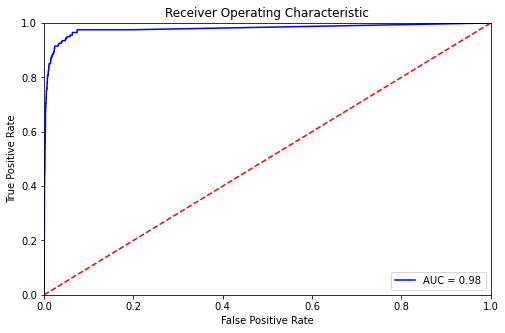

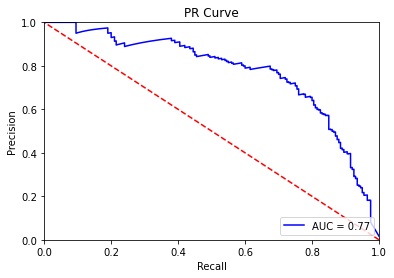

In [25]:
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
rf = RandomForestClassifier(random_state = 14, max_depth = 25, min_samples_split = 5, n_estimators = 900)
param_grid = {
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}]
    
}
parameter_tuning(model=rf, param_grid=param_grid, data=train_data_1 , n_features=n_features)

Perform Random Forest Classification with the selected features and parameters :  


 X_train : (48000, 11)

 X_test : (12000, 11)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix with the predicted class  :
[[11766    34]
 [   73   127]]


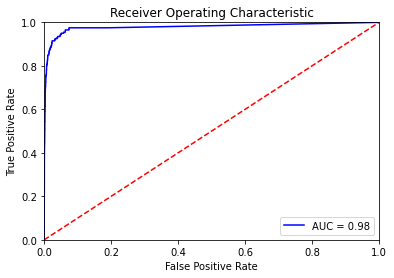

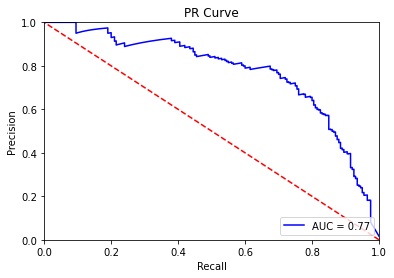

Total_cost of mis- classification : 36840


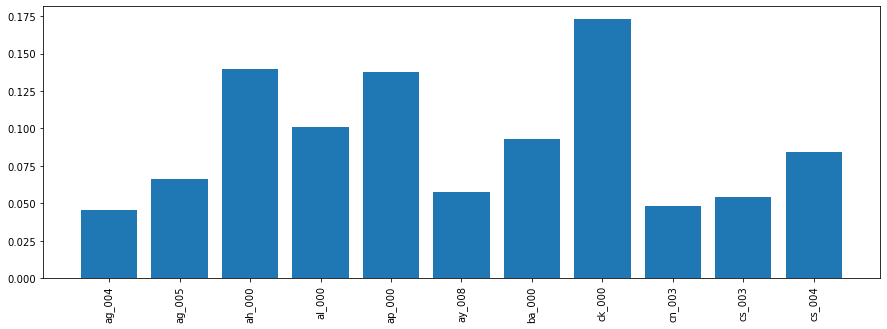

In [26]:
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


rf = RandomForestClassifier(random_state = 14 , class_weight = {0:0.3, 1:0.7} , max_depth = 25,min_samples_split = 5, n_estimators = 900 )
perform_classification(rf , X_train, X_validate, y_train, y_validate , 'rf')

Cross Validate both the models - one with 'balanced' weights and other with selected weight.

[0.66666667 0.64736842 0.69421488 0.60869565 0.64      ]

 Avg AUC score for PR curve:0.6513891231852538
Confusion matrix :
[[58713   287]
 [  380   620]]
Total_cost of mis- classification : 192870


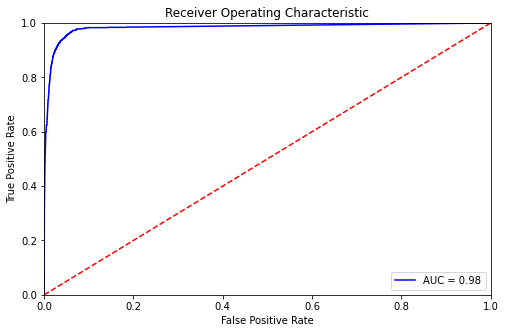

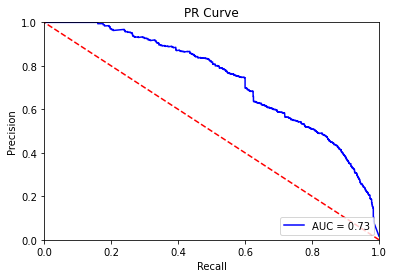

In [33]:
rf = RandomForestClassifier(random_state = 14, max_depth = 25, min_samples_split = 5, n_estimators = 900, class_weight = 'balanced')
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
cross_validation(model=rf, data= train_data_1 , n_features= n_features )

[0.68786127 0.71060172 0.70588235 0.69740634 0.68235294]

 Avg AUC score for PR curve:0.6968209250098585
Confusion matrix :
[[58878   122]
 [  400   600]]
Total_cost of mis- classification : 201220


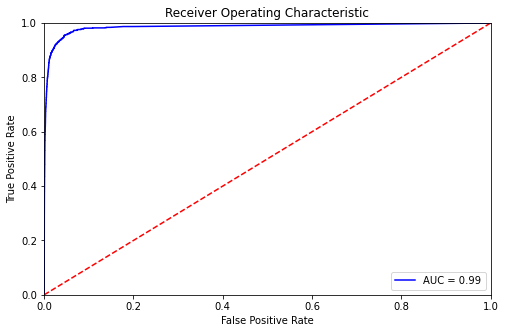

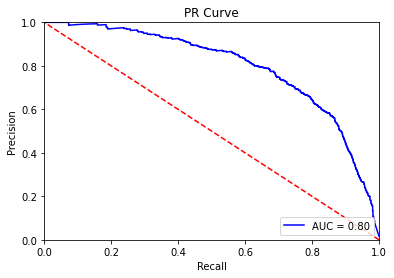

In [34]:
rf = RandomForestClassifier(random_state = 14, max_depth = 25, min_samples_split = 5, n_estimators = 900, class_weight = {0:0.3,1:0.7})
n_features = ['ag_004' , 'ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cn_003', 'cs_003', 'cs_004']
cross_validation(model=rf, data= train_data_1 , n_features= n_features )

##### On Test Data:


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9999166666666667
Train Accuracy using predicted labels :0.9999166666666667
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.989
Confusion matrix with the predicted class  :
[[15586    39]
 [  142   233]]


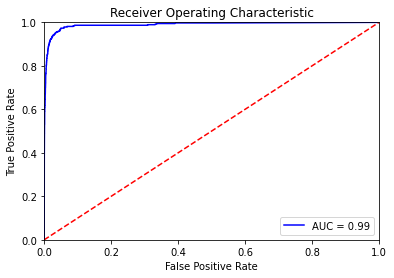

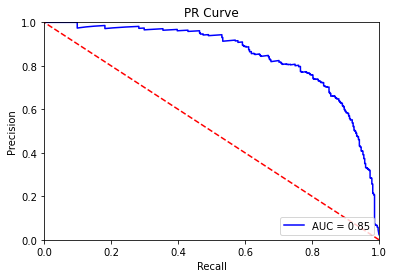

Total_cost of mis- classification : 71390


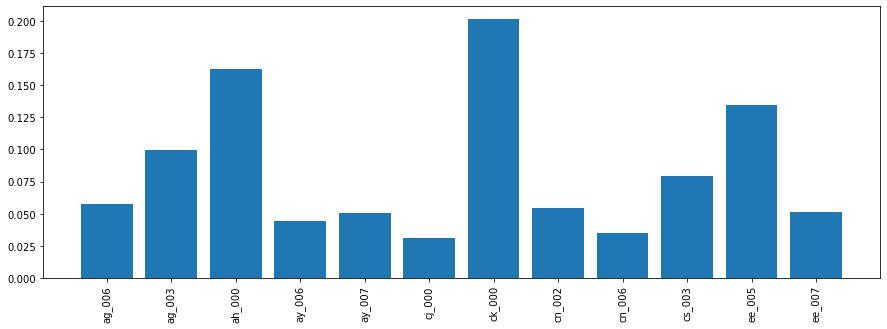

In [36]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


rf = RandomForestClassifier(random_state = 14, max_depth = 25, min_samples_split = 5, n_estimators = 900, class_weight = {0:0.3,1:0.7})
perform_classification(rf , X_train, X_test, y_train, y_test , 'rf')



 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.996875
Train Accuracy using predicted labels :0.996875
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.987
Confusion matrix with the predicted class  :
[[15594    31]
 [  173   202]]


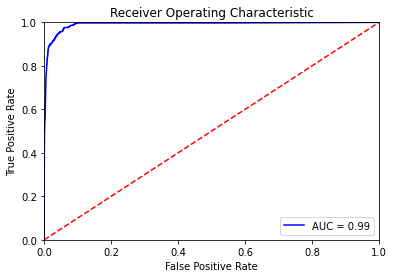

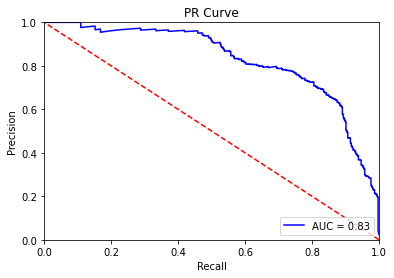

Total_cost of mis- classification : 86810


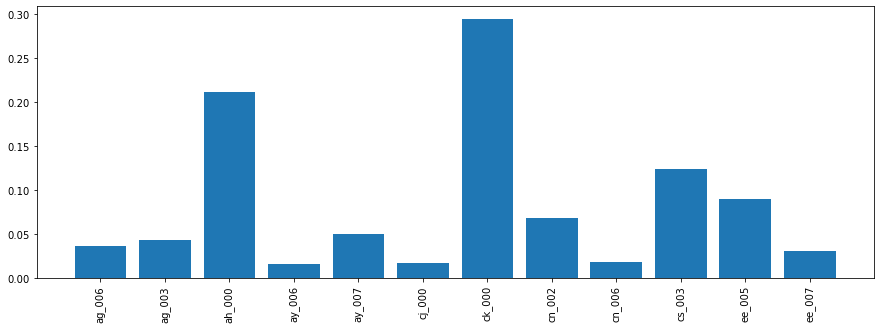

In [35]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_006','ag_003','ah_000','ay_006','ay_007','cj_000','ck_000','cn_002','cn_006','cs_003','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


rf = RandomForestClassifier(random_state = 14, max_depth = 25, min_samples_split = 5, n_estimators = 900, class_weight = 'balanced')
perform_classification(rf , X_train, X_test, y_train, y_test , 'rf')


In [84]:
## save the results 
cls.append('random_forest')
cost.append(71390)
auc_val.append(0.83)

##### Gradient Boosting Classifier


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_003
al_000
ap_000
ay_001
ay_005
ay_006
ck_000
cs_006
ee_005
ee_007


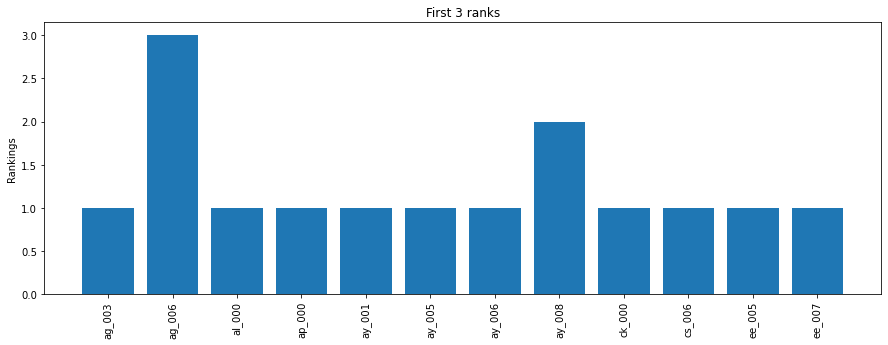

In [38]:
gbm = GradientBoostingClassifier(random_state = 14 )
feature_selection(model = gbm, data = train_data_1, cont_features = cont_features)

Perform GBM Classification with the selected features:  


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9940416666666667
Train Accuracy using predicted labels :0.9940416666666667
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix with the predicted class  :
[[11767    33]
 [   79   121]]


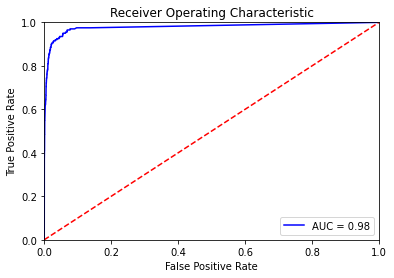

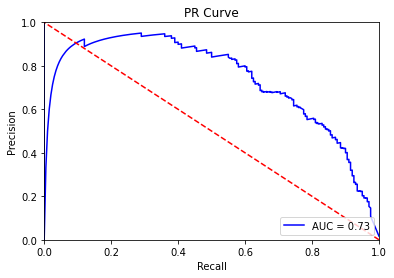

Total_cost of mis- classification : 39830


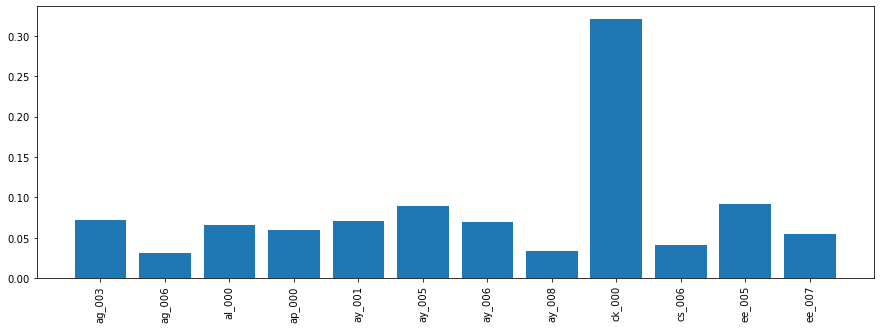

In [39]:
n_features = ['ag_003' , 'ag_006' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


gbm = GradientBoostingClassifier(random_state = 14 )
perform_classification(gbm , X_train, X_validate, y_train, y_validate , 'gbm')

Gridsearch GBM hyper parameters:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix :
[[11761    39]
 [   64   136]]


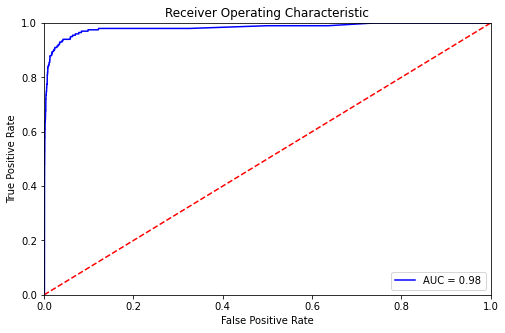

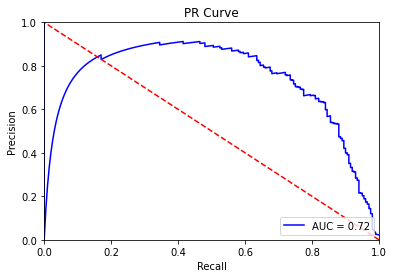

In [41]:
n_features = ['ag_003' , 'ag_006' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

gbm = GradientBoostingClassifier(random_state = 14 )
param_grid = {
    "max_depth" : [3,5],
    "learning_rate" : [0.1, 0.01, 1],
    "n_estimators" : [500,900]
}
parameter_tuning(model= gbm, param_grid=param_grid, data=train_data_1 , n_features=n_features)

Perform GBM Classification with the selected features and params:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix with the predicted class  :
[[11761    39]
 [   64   136]]


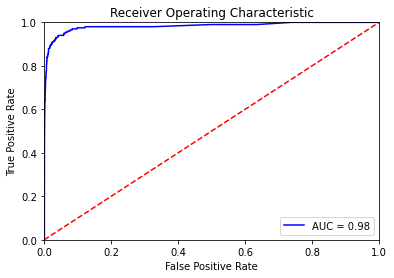

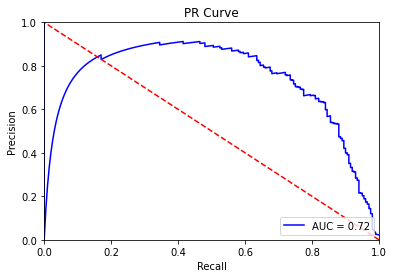

Total_cost of mis- classification : 32390


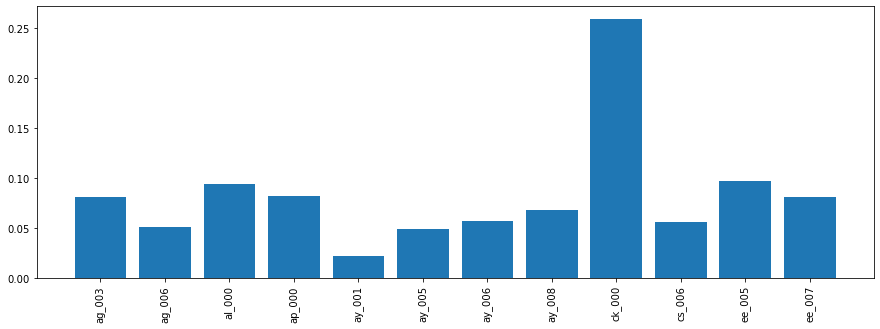

In [42]:
n_features = ['ag_003' , 'ag_006' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


gbm = GradientBoostingClassifier(random_state = 14 , max_depth = 5, learning_rate = 0.1, n_estimators = 500 )
perform_classification(gbm, X_train, X_validate, y_train, y_validate , 'gbm')

Cross Validate :

[0.752      0.75956284 0.7696477  0.7591623  0.72774869]

 Avg AUC score for PR curve:0.7536243065542835
Confusion matrix :
[[58832   168]
 [  294   706]]
Total_cost of mis- classification : 148680


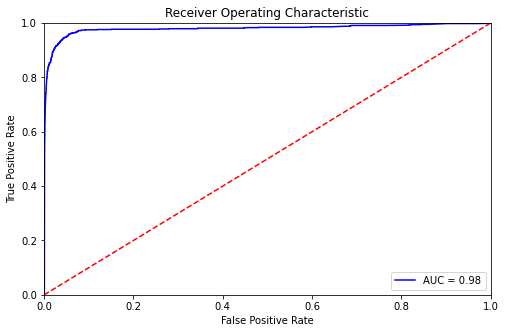

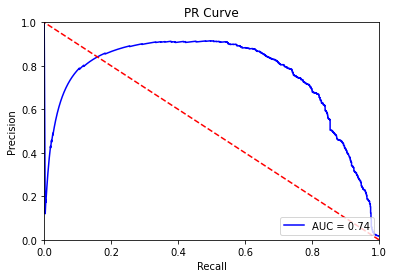

In [43]:
gbm = GradientBoostingClassifier(random_state = 14 , max_depth = 5, learning_rate = 0.1, n_estimators = 500 )
n_features = ['ag_003' , 'ag_006' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']
cross_validation(model=gbm, data= train_data_1 , n_features= n_features )

##### Check performance on test data :


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.987
Confusion matrix with the predicted class  :
[[15583    42]
 [  160   215]]


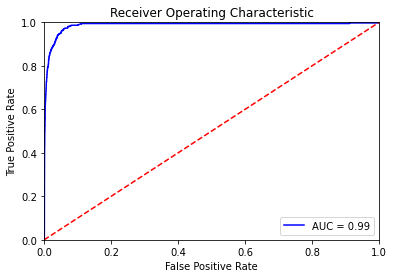

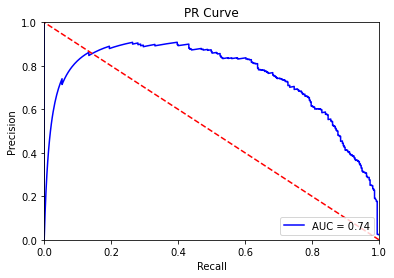

Total_cost of mis- classification : 80420


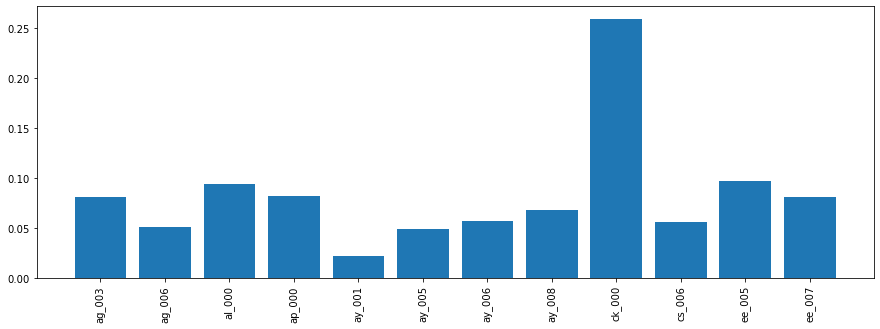

In [44]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_003' , 'ag_006' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


gbm = GradientBoostingClassifier(random_state = 14 , max_depth = 5, learning_rate = 0.1, n_estimators = 500 )
perform_classification(gbm , X_train, X_test, y_train, y_test , 'gbm')


In [85]:
## save the results 
cls.append('gbm')
cost.append(80420)
auc_val.append(0.74)

##### SVM Classifier


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_003
ag_005
ag_006
ay_005
ay_006
ay_007
ay_008
ck_000
cs_004
ee_005


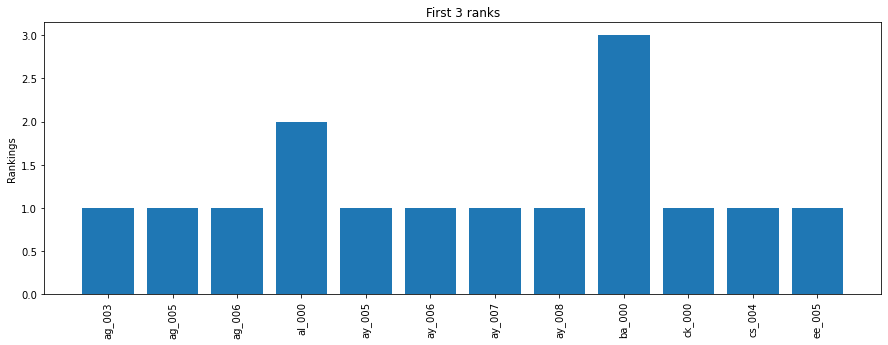

In [46]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12)
feature_selection(model = svm, data = train_data_1, cont_features = cont_features)

Perform Classification with SVM and selected features :


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9792083333333333
Train Accuracy using predicted labels :0.9792083333333333
Test set score using predicted labels: 0.97
Calculated Test set score: 0.97
Accuracy score :0.971
Confusion matrix with the predicted class  :
[[11473   327]
 [   18   182]]


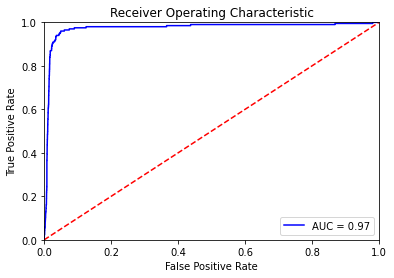

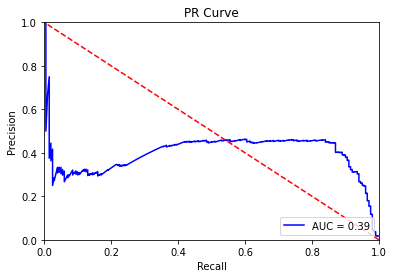

Total_cost of mis- classification : 12270


In [24]:
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


svm = SVC( probability = True , class_weight = 'balanced', random_state = 12)
perform_classification(svm, X_train, X_validate, y_train, y_validate , 'svm')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.963875
Train Accuracy using predicted labels :0.963875
Test set score using predicted labels: 0.96
Calculated Test set score: 0.96
Accuracy score :0.959
Confusion matrix with the predicted class  :
[[11324   476]
 [   17   183]]


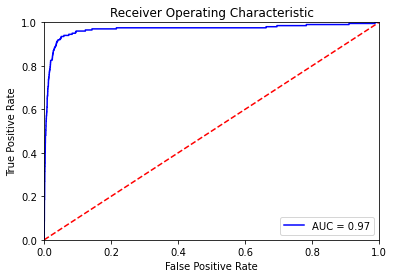

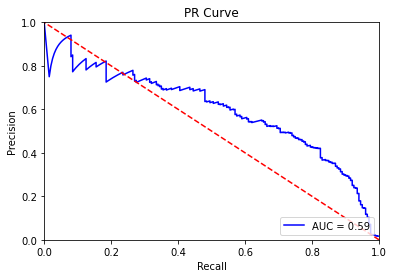

Total_cost of mis- classification : 13260


In [47]:
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12)
perform_classification(svm, X_train, X_validate, y_train, y_validate , 'svm')

Cross validate:

[0.52347084 0.54736842 0.51785714 0.51515152 0.53197674]

 Avg AUC score for PR curve:0.5271649325015298
Confusion matrix :
[[57505  1495]
 [  107   893]]
Total_cost of mis- classification : 68450


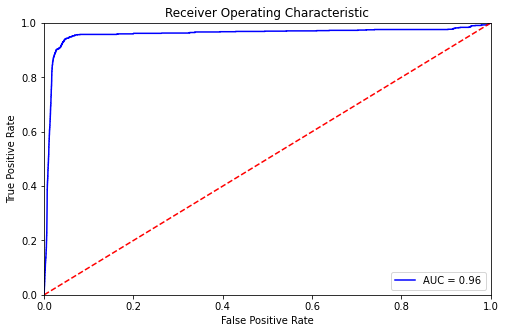

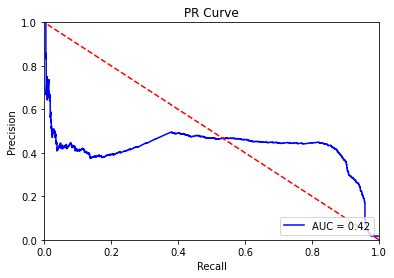

In [25]:
svm = SVC( probability = True , class_weight = 'balanced', random_state = 12)
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']
cross_validation(model=svm, data= train_data_1 , n_features= n_features )

[0.43601896 0.44205496 0.46289308 0.4516129  0.4638404 ]

 Avg AUC score for PR curve:0.4512840599038538
Confusion matrix :
[[56837  2163]
 [   79   921]]
Total_cost of mis- classification : 61130


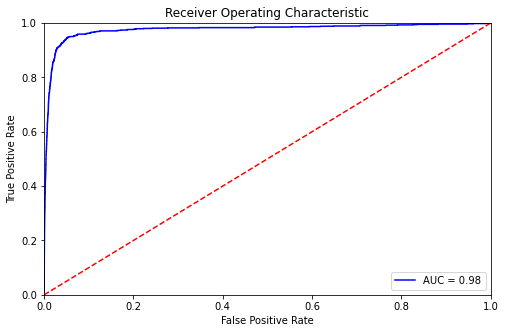

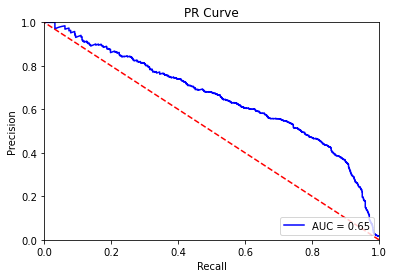

In [23]:
svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12)
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']
cross_validation(model=svm, data= train_data_1 , n_features= n_features )

Check the performance on test data :

In [ ]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


svm = SVC( probability = True , class_weight = 'balanced', random_state = 12)
perform_classification(svm , X_train, X_test, y_train, y_test , 'svm')



 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.963875
Train Accuracy using predicted labels :0.963875
Test set score using predicted labels: 0.97
Calculated Test set score: 0.97
Accuracy score :0.969
Confusion matrix with the predicted class  :
[[15183   442]
 [   49   326]]


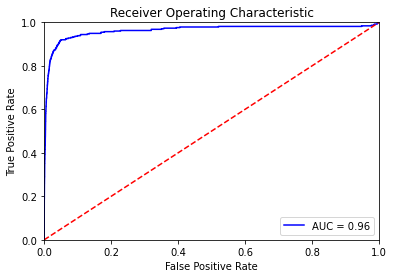

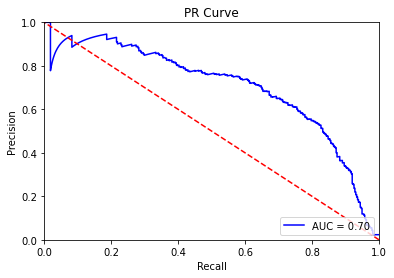

Total_cost of mis- classification : 28920


In [28]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12)
perform_classification(svm , X_train, X_test, y_train, y_test , 'svm')


In [86]:
## save the results 
cls.append('svm')
cost.append(28920)
auc_val.append(0.7)

AdaBoost Classifier


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ah_000
ay_008
az_005
az_006
ck_000
cn_003
cs_004
cs_006
ee_005
ee_007


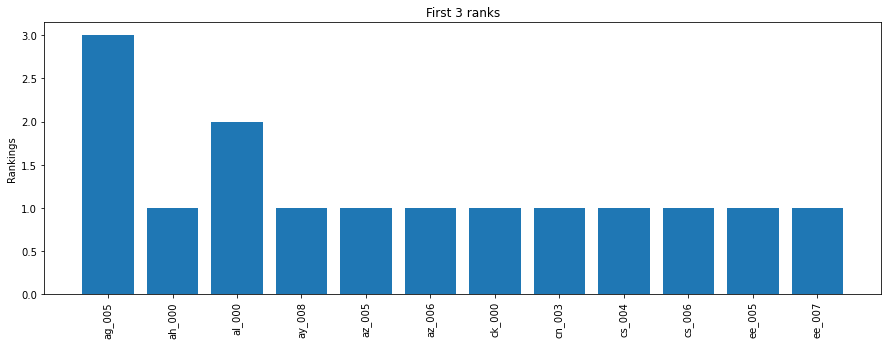

In [76]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 12)
feature_selection(model = ada, data = train_data_1, cont_features = cont_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9895833333333334
Train Accuracy using predicted labels :0.9895833333333334
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix with the predicted class  :
[[11750    50]
 [   89   111]]


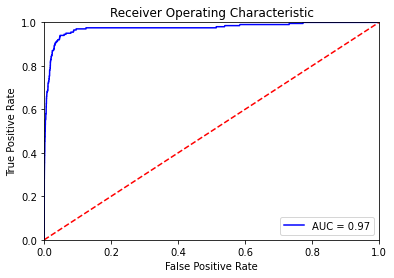

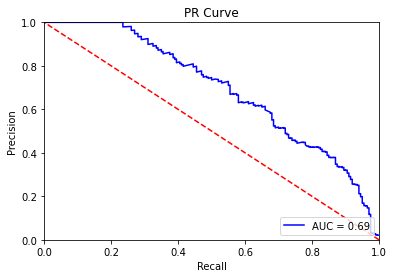

Total_cost of mis- classification : 45000


In [77]:
n_features = ['ah_000','ag_005' ,'al_000' , 'ay_008' , 'az_005' ,'az_006', 'ck_000' , 'cn_003','cs_004', 'cs_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


ada = AdaBoostClassifier( n_estimators = 100, random_state = 12)
perform_classification(ada, X_train, X_validate, y_train, y_validate , 'ada')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'learning_rate': 1, 'n_estimators': 800}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11742    58]
 [   85   115]]


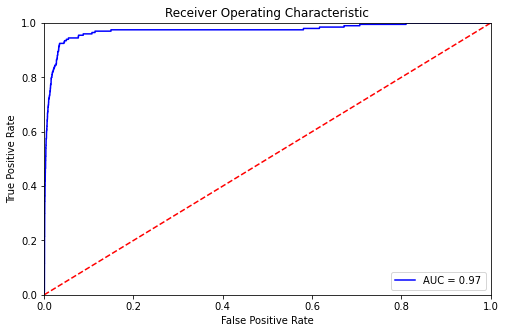

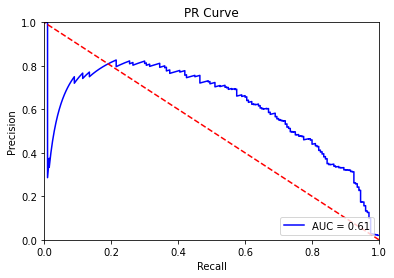

In [78]:
n_features = ['ah_000','ag_005' ,'al_000' , 'ay_008' , 'az_005' ,'az_006', 'ck_000' , 'cn_003','cs_004', 'cs_006','ee_005','ee_007']

ada = AdaBoostClassifier(random_state = 14 )
param_grid = {
    "n_estimators" : [100,400,800],
    "learning_rate" : [0.1, 0.01, 1]
    
}
parameter_tuning(model= ada, param_grid=param_grid, data=train_data_1 , n_features = n_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9920833333333333
Train Accuracy using predicted labels :0.9920833333333333
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix with the predicted class  :
[[11742    58]
 [   85   115]]


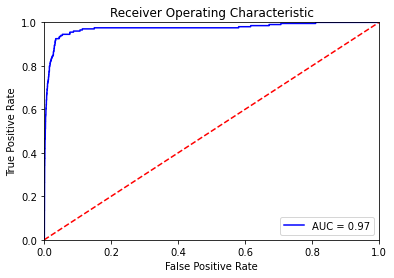

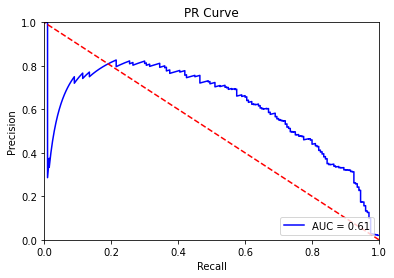

Total_cost of mis- classification : 43080


In [79]:
n_features = ['ah_000','ag_005' ,'al_000' , 'ay_008' , 'az_005' ,'az_006', 'ck_000' , 'cn_003','cs_004', 'cs_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


ada = AdaBoostClassifier( n_estimators = 800, random_state = 12, learning_rate = 1)
perform_classification(ada, X_train, X_validate, y_train, y_validate , 'ada')

Cross Validation:  

[0.615 0.575 0.52  0.53  0.53 ]

 Avg AUC score for PR curve:0.554
Confusion matrix :
[[58773   227]
 [  446   554]]
Total_cost of mis- classification : 225270


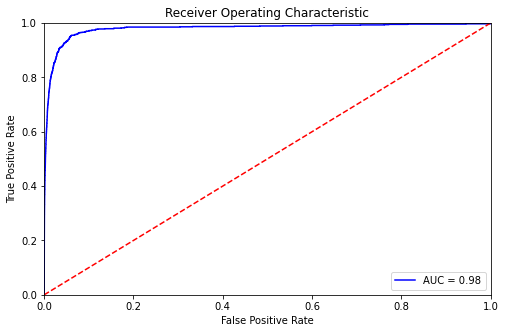

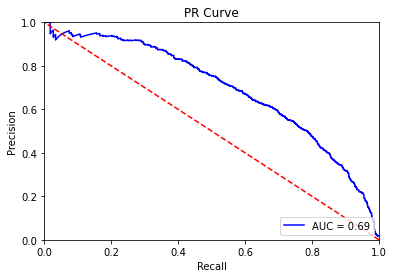

In [80]:
ada = AdaBoostClassifier(n_estimators = 800, random_state = 12, learning_rate = 1)
n_features = ['ah_000','ag_005' ,'al_000' , 'ay_008' , 'az_005' ,'az_006', 'ck_000' , 'cn_003','cs_004', 'cs_006','ee_005','ee_007']
cross_validation(model=ada, data= train_data_1 , n_features= n_features )

Check model on Test data:  


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9920833333333333
Train Accuracy using predicted labels :0.9920833333333333
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.984
Confusion matrix with the predicted class  :
[[15541    84]
 [  169   206]]


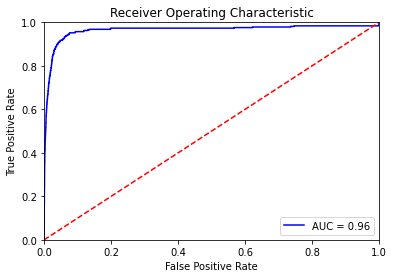

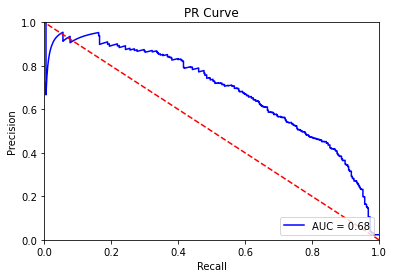

Total_cost of mis- classification : 85340


In [81]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ah_000','ag_005' ,'al_000' , 'ay_008' , 'az_005' ,'az_006', 'ck_000' , 'cn_003','cs_004', 'cs_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


ada = AdaBoostClassifier(n_estimators = 800, random_state = 12, learning_rate = 1)
perform_classification(ada , X_train, X_test, y_train, y_test , 'ada')


In [87]:
## save the results 
cls.append('ada')
cost.append(85340)
auc_val.append(0.68)

MLP Classifier:

In [111]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 12, max_iter = 1000)
feature_selection(model = mlp, data = train_data_1, cont_features = cont_features)



 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)


RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes


 X_train : (48000, 32)

 X_test : (12000, 32)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9990833333333333
Train Accuracy using predicted labels :0.9990833333333333
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.993
Confusion matrix with the predicted class  :
[[11769    31]
 [   53   147]]


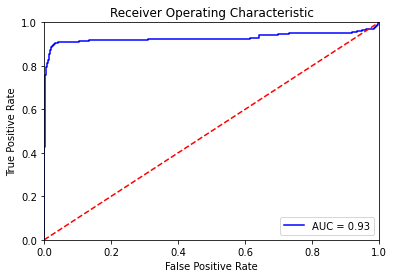

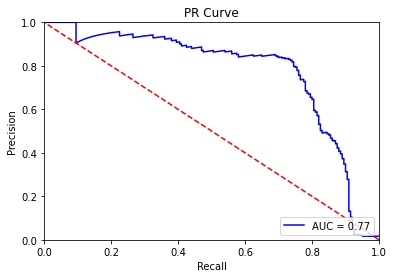

Total_cost of mis- classification : 26810


In [112]:
n_features = cont_features
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


mlp = MLPClassifier( random_state = 12,  max_iter = 1000)
perform_classification(mlp, X_train, X_validate, y_train, y_validate , 'mlp')

Grid Search CV :


 X_train : (48000, 32)

 X_test : (12000, 32)

 y_train : (48000,)

 y_test : (12000,)
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100, 100)}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix :
[[11767    33]
 [   72   128]]


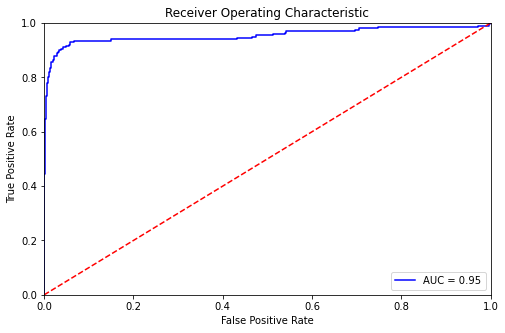

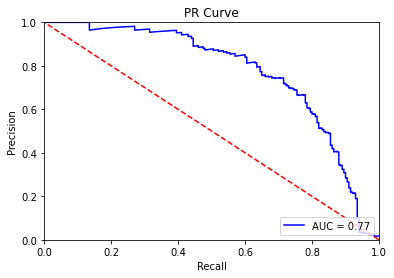

In [113]:
n_features = cont_features
mlp = MLPClassifier(random_state = 14, max_iter = 1000 )
param_grid = {
    "activation" : ['relu','logistic'],
    "alpha" : [0.1, 0.01, 1],
    "hidden_layer_sizes" :[(100,),(100,100),(100,100,100)]
    
}
parameter_tuning(model= mlp, param_grid=param_grid, data=train_data_1 , n_features = n_features)


 X_train : (48000, 32)

 X_test : (12000, 32)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.99875
Train Accuracy using predicted labels :0.99875
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.990
Confusion matrix with the predicted class  :
[[11747    53]
 [   64   136]]


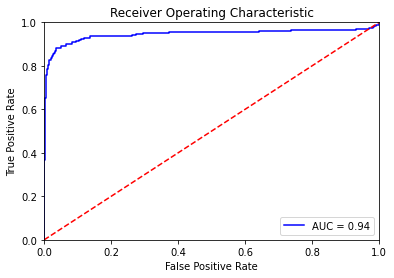

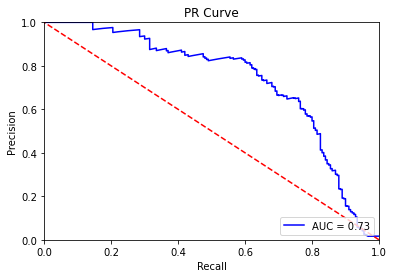

Total_cost of mis- classification : 32530


In [115]:
n_features = cont_features
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


mlp = MLPClassifier( random_state = 12,  max_iter = 1000, activation = 'relu', alpha = 0.01, hidden_layer_sizes = (100, 100, 100))
perform_classification(mlp, X_train, X_validate, y_train, y_validate , 'mlp')

Cross Validation: 

[0.765 0.765 0.765 0.75  0.765]

 Avg AUC score for PR curve:0.762
Confusion matrix :
[[58777   223]
 [  238   762]]
Total_cost of mis- classification : 121230


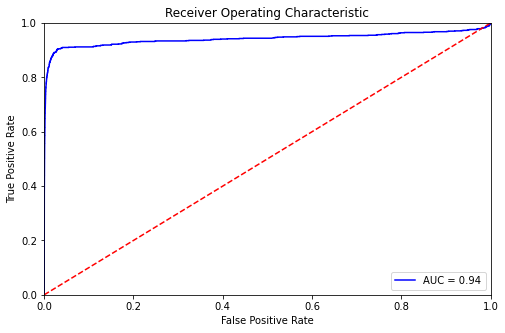

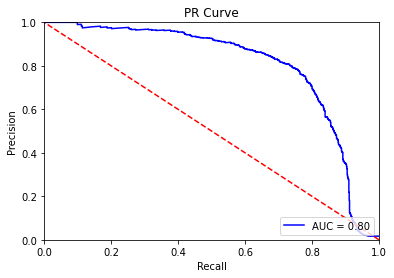

In [116]:
mlp = MLPClassifier( random_state = 12,  max_iter = 1000, activation = 'relu', alpha = 0.01, hidden_layer_sizes = (100, 100, 100))
n_features = cont_features
cross_validation(model=mlp, data= train_data_1 , n_features= n_features )

[0.745 0.7   0.685 0.705 0.65 ]

 Avg AUC score for PR curve:0.697
Confusion matrix :
[[58848   152]
 [  303   697]]
Total_cost of mis- classification : 153020


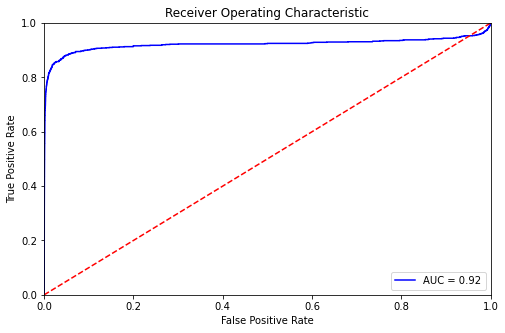

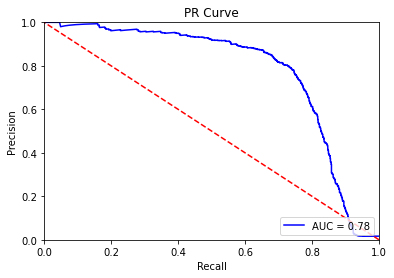

In [119]:
mlp = MLPClassifier( random_state = 12,  max_iter = 1000)
n_features = cont_features
cross_validation(model=mlp, data= train_data_1 , n_features= n_features )

In [ ]:
Check on Test Data :


 X_train : (60000, 32)

 X_test : (16000, 32)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.99875
Train Accuracy using predicted labels :0.99875
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.990
Confusion matrix with the predicted class  :
[[15585    40]
 [  128   247]]


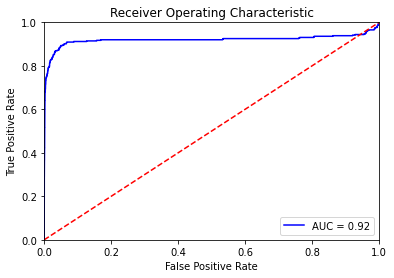

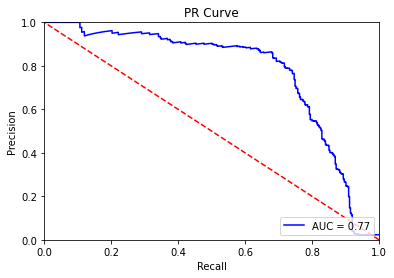

Total_cost of mis- classification : 64400


In [120]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = cont_features 

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_1.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


mlp = MLPClassifier( random_state = 12,  max_iter = 1000,activation = 'relu', alpha = 0.01, hidden_layer_sizes = (100, 100, 100))
perform_classification(mlp , X_train, X_test, y_train, y_test , 'mlp')


In [121]:
## save the results 
cls.append('mlp')
cost.append(64400)
auc_val.append(0.77)

In [123]:
df = pd.DataFrame({"cls" : cls, "cost" :cost , "auc_val" :auc_val})
## save the results 
df.to_csv("Results_1.csv", index = False)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

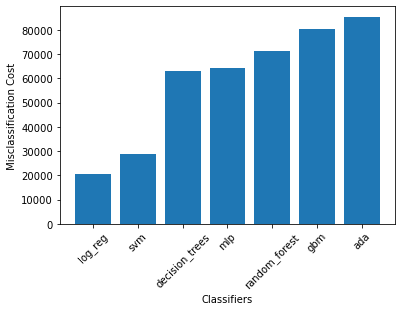

In [124]:
## Display the results 
df = df.sort_values(by = 'cost')
plt.bar(df['cls'], df['cost'])
plt.xlabel("Classifiers")
plt.ylabel(" Misclassification Cost ")
plt.xticks(rotation = 45)